## How to effectively learn Matplotlib

Matplotlib (MPL) is a powerhouse for data visualization. 

### The object oriented interface
MPL provides two different interfaces for plotting. Either interface allows you to achieve the same results. These different ways of doing things cause a lot of confusion for new users. If you go to Stack Overflow to post a question of using MPL, often time you would find people have different answers for your question. 

##### Matplotlib's two interfaces for plotting:
1. MATLAB style plotting using pyplot
2. Object oriented interface

Check out the official documentation of the object-oriented API here: 
https://matplotlib.org/3.1.1/api/index.html#the-object-oriented-api

My strategy in solving this problem is to stick with the object oriented interface! 

##### A Figure in MLP contains two different types of objects
1. Figure object
2. Axes object
A Figure object can contain one or more axes objects. One axes represents one plot. 

### The Figure object

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ujson as json
import gzip

%matplotlib inline

/Applications/anaconda3/envs/insight/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Applications/anaconda3/envs/insight/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
fig = plt.figure() #the output is matplotlib.figure.Figure.plt.figure(), 
                 #which returns a Figure object
print(type(fig))

<class 'matplotlib.figure.Figure'>


<Figure size 432x288 with 0 Axes>

In [3]:
#create a title
fig.suptitle('Figure examples')
#display
plt.show()

### The Axes object
A figure needs at least one axes. Once you get the <i> axes <i> object, you can call the methods of the <i> axes <i> object to generate plots. 

You can use <i> add_subplot(num_rows, num_cols, subplot_location) <i> method to create a set of subplots. These subplots would be placed on a grid with a size of (num_rows, num_cols). This method returns an axes object for the subplot at subplot_location. 
    
Below are some other common methos:

<i> plot(x,y) <i>: generate y vs x graph

<i>set_xlabel()<i>: label for the x-axis

<i>set_ylabel()<i>: label for the y-axis

<i>set_title()<i>: title of the plot

<i>legend()<i>: generate legend for the graph
    
<i>hist()<i>: generate histogram plot

<i>scatter()<i>: generate scatter plot
    

The complete list of methods of axes class can be found here:
https://matplotlib.org/api/axes_api.html
    
##### Example 1 - single plot

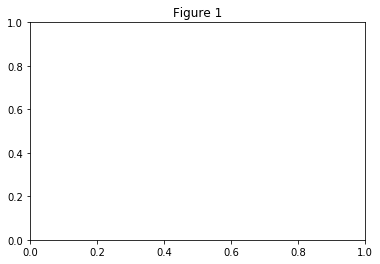

In [4]:
#close previously created figure object
plt.close('all')

#always create a new figure object first
fig = plt.figure()
#create an ax object
ax = fig.add_subplot(1,1,1)
#set the title of the new plot
ax.set_title("Figure 1")
#display
plt.show()

##### Example 2 - multiple plots

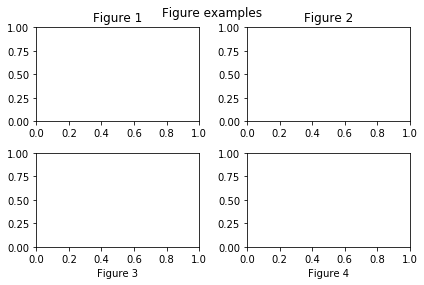

In [5]:
#close previously created figure object
plt.close('all')

#always create a new figure object first
fig = plt.figure()
#add a title to the figure
fig.suptitle('Figure examples')

#generate a grid of 2x2 subplots and get axes object for 1st location
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('Figure 1')

#get the axes object for subplot at 2nd location
ax2 = fig.add_subplot(2,2,2)
ax2.set_title('Figure 2')

#get the axes object for subplot at 3rd location
ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel('Figure 3')

#get the axes object for subplot at 4th location
ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel('Figure 4')

#use plt.tight_layout() to display instead of plt.show()
#this avoids the overlaying of axes between neighboring plots
plt.tight_layout()

##### Example 3 - plotting a line

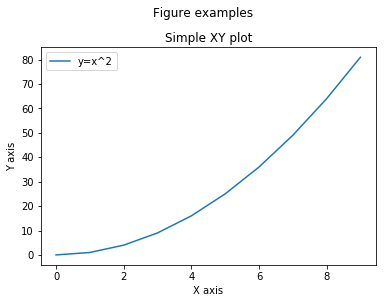

In [6]:
#generate data for plots 
x = [i for i in range(10)]
y = [i**2 for i in x]

#close previously created figure object
plt.close('all')

#always create a figure object first
fig = plt.figure()
#add a title to the figure
fig.suptitle('Figure examples', y = 1.02)

#get the axes instance at 1st location in 1x1 grid
ax = fig.add_subplot(1,1,1)

#generate the plot
ax.plot(x, y, label="y=x^2")
#add legend
ax.legend()

#set labels for x and y axis
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')

#set title for the plot
ax.set_title('Simple XY plot')

plt.show()

##### Example 4 - plotting multiple graphs in the same plot

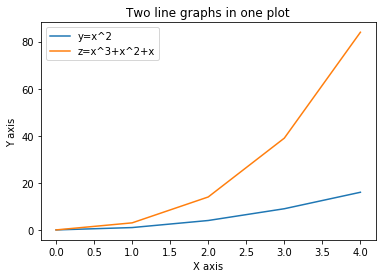

In [7]:
#generate data for plots 
x = [i for i in range(5)]
y = [i**2 for i in x] # y = x^2
z = [i**3+i**2+i for i in x] # z = x^3 + x^2 + x

##close previously created figure object
plt.close('all')

# plot y = x^2 and z = x^3 + x^2 + x in the same subplot window
fig = plt.figure()

# Get the axes instance
ax = fig.add_subplot(1,1,1)

#plot y and z separately using .plot() method
ax.plot(x, y, label='y=x^2')
ax.plot(x, z, label='z=x^3+x^2+x')
#add legend
ax.legend()

#set axes labels
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")

#set title
ax.set_title('Two line graphs in one plot')

plt.show()


##### Example 5 - plotting multiple graphs in separate plots in a Figure

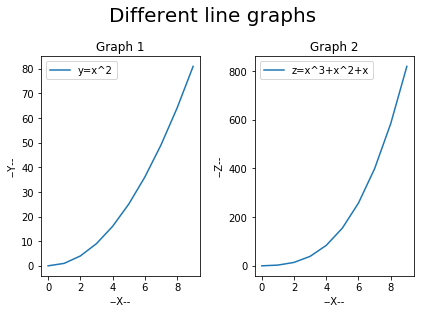

In [8]:
#generate data for plots 
x = [i for i in range(10)]
y = [i**2 for i in x] # y = x^2
z = [i**3+i**2+i for i in x] # z = x^3 + x^2 + x

#close previously created figure object
plt.close('all')

# plot y = x^2 and z = x^3 + x^2 + x in the same subplot window
fig = plt.figure()
fig.suptitle("Different line graphs", y = 1.08, fontsize = 20)

# Get the axes instance
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#plot y and z separately using .plot() method on different axes
ax1.plot(x, y, label='y=x^2')
ax2.plot(x, z, label='z=x^3+x^2+x')
#add legend
ax1.legend()
ax2.legend()

#set axes labels
ax1.set_xlabel("--X--")
ax1.set_ylabel("--Y--")
ax2.set_xlabel("--X--")
ax2.set_ylabel("--Z--")

#set title
ax1.set_title('Graph 1')
ax2.set_title('Graph 2')
plt.tight_layout()

##### Example 6 - Histogram plots
When you want to visualize the underlying distribution of data, histogram plot is the go-to plot. 

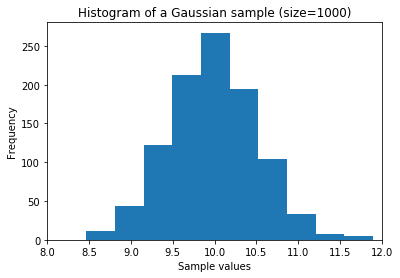

In [9]:
#generate 1000 numbers from gaussian sample
def gaussian_sampling(mean, std, num_samples=1000):
    samples = np.random.normal(mean, std, num_samples)
    return samples

#close previously created figure object
plt.close('all')

#create an instance of figure object
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#generate histogram plot
ax.hist(gaussian_sampling(10, 0.5, num_samples=1000))
ax.set_xlim(8,12)
ax.set_xlabel('Sample values')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of a Gaussian sample (size=1000)')

plt.show()

##### Now, let's have a bit of fun

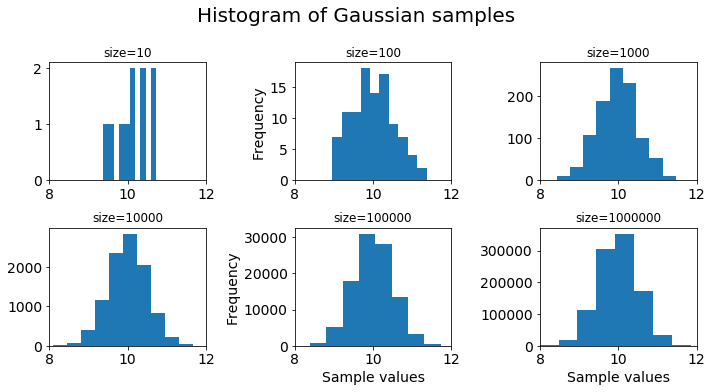

In [10]:
#close previously created figure object
plt.close('all')

#create an instance of figure object
fig = plt.figure(figsize=(10,5))


fig.suptitle('Histogram of Gaussian samples', y=1.08, fontsize=20) #here y = 1.08 sets the location so 
                                                                #it wont overlay with the tile of the subplot
fontsize = 14
#generate a set of histogram plots
num_samples = [10,100,1000,10000,100000,1000000]
for idx, n in enumerate(num_samples):
    ax = fig.add_subplot(2,3,idx+1)
    ax.hist(gaussian_sampling(10, 0.5, num_samples=n))
    ax.set_xlim(8,12)
    if idx>3:
        ax.set_xlabel('Sample values', fontsize=fontsize)
    if idx in [1,4]:
        ax.set_ylabel('Frequency', fontsize=fontsize)
    ax.set_title('size=%d' % n)
    ax.tick_params(axis='both', which='major',labelsize=14)
    ax.tick_params(axis='both', which='minor',labelsize=10)

plt.tight_layout()

According to 3 sigma rule, 99.7% samples of a gaussian distribution lies within three standard deviations of the mean. As the sample size gets bigger, the distribution gets more bell-shape like. 

### Visualizing larger dataset

Now, let's play with the “California Housing Price Dataset”, which can be downloaded from kaggle through the following link:
https://www.kaggle.com/camnugent/california-housing-prices

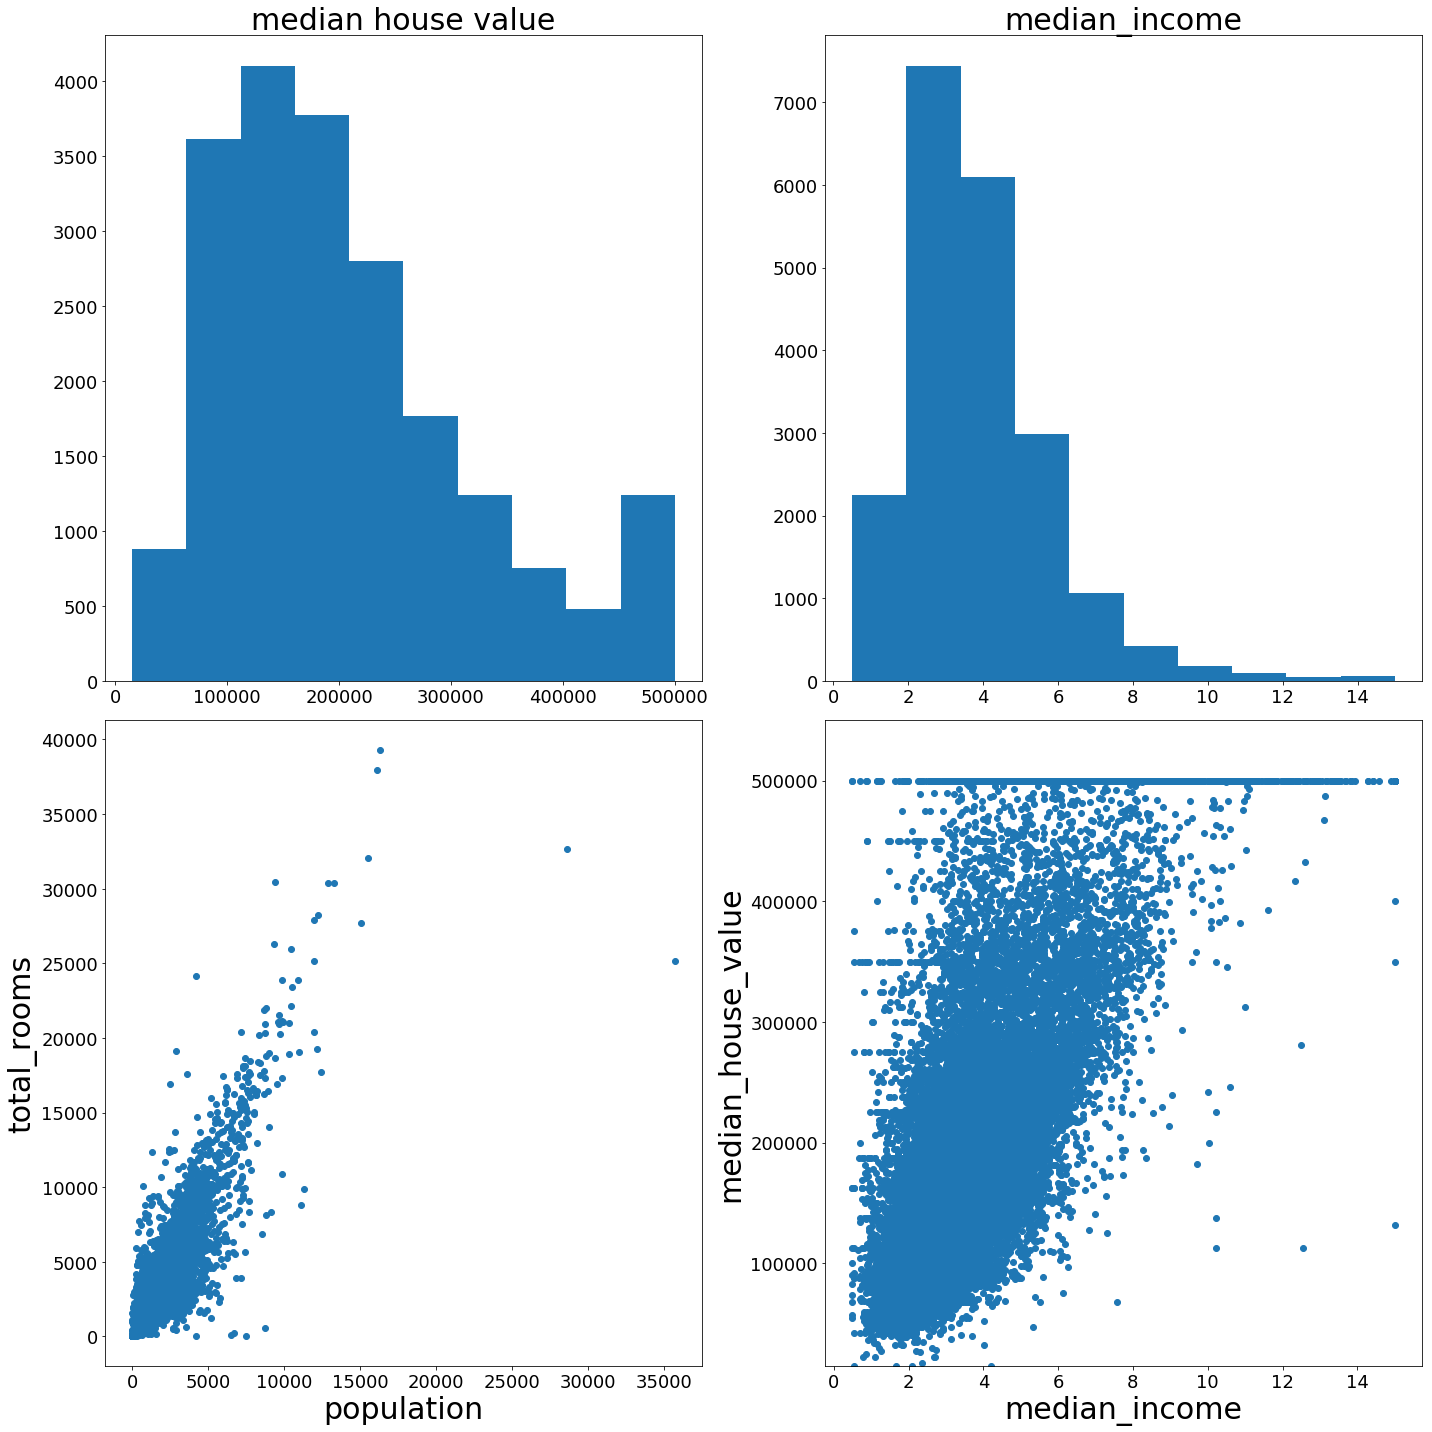

In [11]:
#read in the csv file as a pandas dataframe
df_housing = pd.read_csv("housing.csv")

#close previously created figure object
plt.close('all')

#create a new instance of Figure object and an array of axes objects
fig, arr_ax = plt.subplots(2, 2, figsize=(20,20))

#set fontsize 
fontsize_title = 30
fontsize_label = 18

#histogram - median_house_value
arr_ax[0,0].hist(df_housing['median_house_value'])
arr_ax[0,0].set_title('median house value', fontsize=fontsize_title)
arr_ax[0,0].tick_params(axis='both', which='major',labelsize=fontsize_label)

#histogram - median_income
arr_ax[0,1].hist(df_housing['median_income'])
arr_ax[0,1].set_title('median_income', fontsize=fontsize_title)
arr_ax[0,1].tick_params(axis='both', which='major',labelsize=fontsize_label)

#scatter - population vs total_rooms
arr_ax[1,0].scatter(df_housing['population'], df_housing['total_rooms'])
arr_ax[1,0].set_xlabel('population', fontsize=fontsize_title)
arr_ax[1,0].set_ylabel('total_rooms', fontsize=fontsize_title)
arr_ax[1,0].tick_params(axis='both', which='major',labelsize=fontsize_label)

#scatter - median_income vs median_house_value
arr_ax[1,1].scatter(df_housing['median_income'], df_housing['median_house_value'])
arr_ax[1,1].set_ylim(min(df_housing['median_house_value']), max(df_housing['median_house_value'])+50000)
arr_ax[1,1].set_xlabel('median_income', fontsize=fontsize_title)
arr_ax[1,1].set_ylabel('median_house_value', fontsize=fontsize_title)
arr_ax[1,1].tick_params(axis='both', which='major',labelsize=fontsize_label)

plt.tight_layout()

##### You can see that MPL is extremely powerful in the sense that you can almost customized any aspects of a plot by setting the parameters by calling the massive list of methods of the axes objects. 

### Advanced Matplotlib

Now you know the basics and how does MPL's object oriented interface work. Let's get to more advanced stuff!

In [12]:
# Load data locally
with gzip.open('yelp_train_academic_dataset_business.json.gz') as f:
    data = [json.loads(line) for line in f]

In [13]:
#covert into a DataFrame
df_yelp = pd.DataFrame.from_dict(data)

In [14]:
df_yelp.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,7,3.5,AZ,business
1,"{'Take-out': True, 'Good For': {'dessert': Fal...",JwUE5GmEO-sH1FuwJgKBlQ,[Restaurants],De Forest,"6162 US Highway 51\nDe Forest, WI 53532",{},43.238893,-89.335844,Pine Cone Restaurant,[],True,26,4.0,WI,business
2,"{'Take-out': True, 'Good For': {'dessert': Fal...",uGykseHzyS5xAMWoN6YUqA,"[American (Traditional), Restaurants]",De Forest,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",43.252267,-89.353437,Deforest Family Restaurant,[],True,16,4.0,WI,business
3,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",LRKJF43s9-3jG9Lgx4zODg,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",43.251045,-89.374983,Culver's,[],True,7,4.5,WI,business
4,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",RgDg-k9S5YD_BaxMckifkg,"[Chinese, Restaurants]",De Forest,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",43.240875,-89.343722,Chang Jiang Chinese Kitchen,[],True,3,4.0,WI,business


##### Let's say we are interested in knowing how the average star ratings in each city are different. Then, we first need to get the average star ratings for each city

In [15]:
#first sort the data by city (alphabetically)
df_yelp = df_yelp.sort_values(by='city')
#create an id using index
df_yelp['id'] = df_yelp.index

In [16]:
# Create a new dataframe df_city to contain the unique city names and each city's average star rating

#get unique city names
df_city = pd.DataFrame(df_yelp['city'].unique().tolist(), columns = ['city'])
#get the total counts for each unique city
df_city['counts'] = [i for i in df_yelp.groupby('city')['id'].nunique()]
#average star rating
df_city['avg_stars'] = [i for i in df_yelp.groupby('city')['stars'].mean()]

df_city.head()

,city,counts,avg_stars
0,Ahwatukee,8,3.687500
1,Anthem,55,3.781818
2,Apache Junction,80,3.637500
3,Arcadia,1,5.000000
4,Atlanta,1,3.500000


In [17]:
top_count_50 = df_city.sort_values(by=['counts'],ascending=False)[:50].reset_index()
top_rating_10 = top_count_50.sort_values(by=['avg_stars'],ascending=False)[:10].reset_index()

In [18]:
print(top_rating_10)

   level_0  index            city  counts  avg_stars
0       41      8    Boulder City      22   4.136364
1       19     14      Cave Creek     131   3.912214
2       36     12        Carefree      36   3.888889
3       37    119  San Tan Valley      31   3.870968
4       47    165       Youngtown      14   3.857143
5       38    152          Verona      31   3.854839
6        2    121      Scottsdale    3226   3.820676
7        3     31       Edinburgh    2595   3.796339
8       21     39  Fountain Hills     105   3.790476
9       32      1          Anthem      55   3.781818


#### MPL has many different styles available for rendering plots. 

In [19]:
#Check out the available styles on your system
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10']

#### seaborn-bright

In [20]:
#use a simple style like seaborn-bring to plot the graph


#Define a function to plot
def Plot_barH(style_plot):
    plt.style.use(style_plot)
    fig, ax = plt.subplots(figsize=(12,4))
    fig.suptitle('Bar graph of top 10 cities with highest average star ratings', y=1.06, fontsize=20)
    
    #plotting
    top_rating_10.plot(kind='barh', y='avg_stars', x='city', ax=ax)
    
    #add title and axes labels
    ax.set_title(style_plot, fontsize=18)
    ax.set_xlabel('Average star ratings', fontsize=18)
    ax.set_ylabel('City', fontsize=18)
    #you can also change title and labels in one go, but you cant set the fontsize
    #ax.set(title=style_plot, xlabel='Average star ratings', ylabel='City')
   
    #set tick label size
    ax.tick_params(axis='both', which='major',labelsize=14)
    
    #control the visibility of legends 
    ax.legend().set_visible(False)

    plt.tight_layout()
    

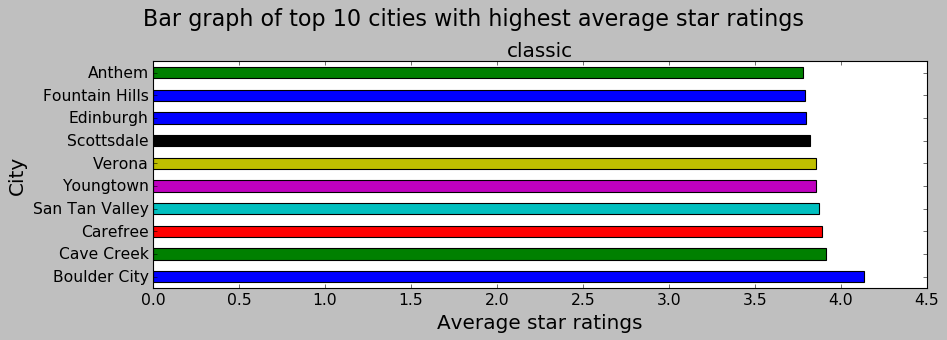

In [21]:
#make the first plot using the style: 'classic'
Plot_barH('classic')

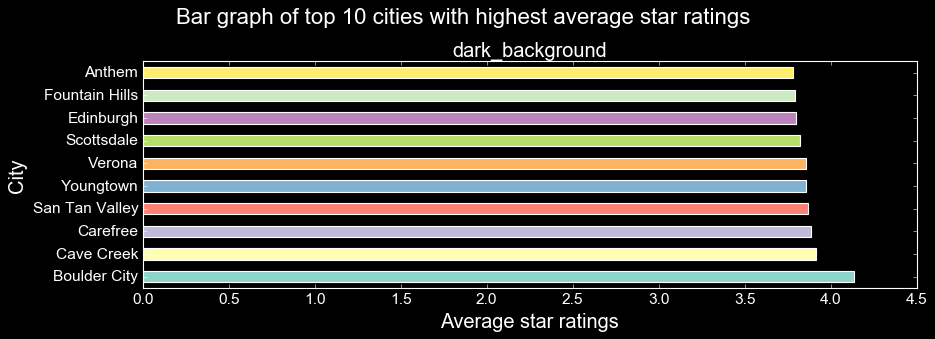

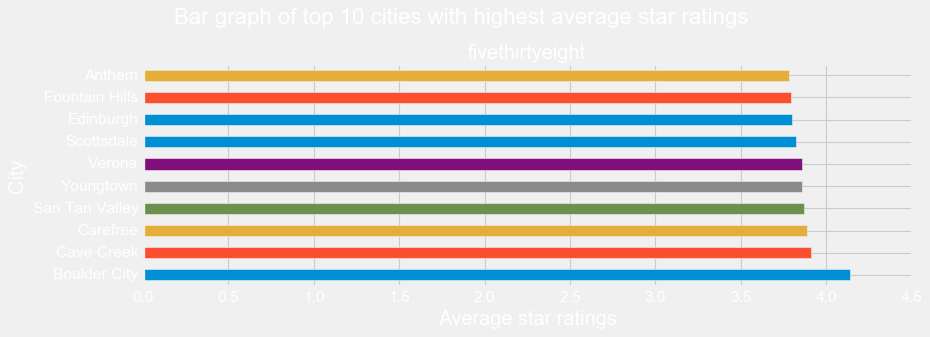

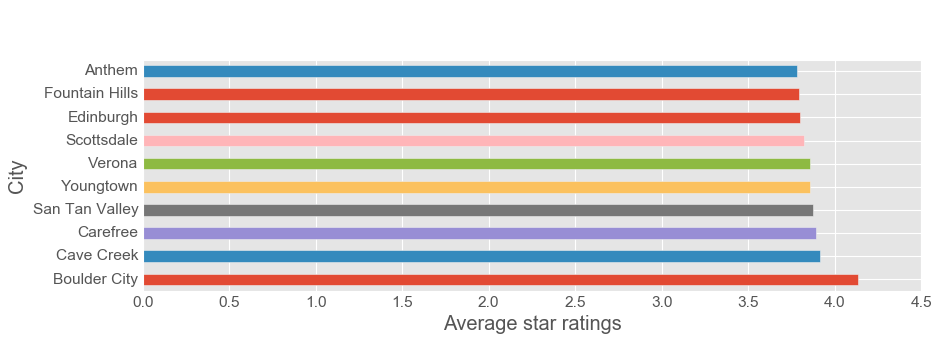

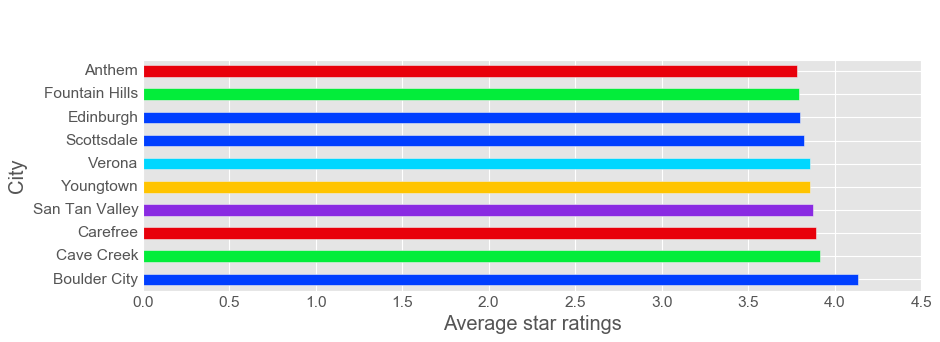

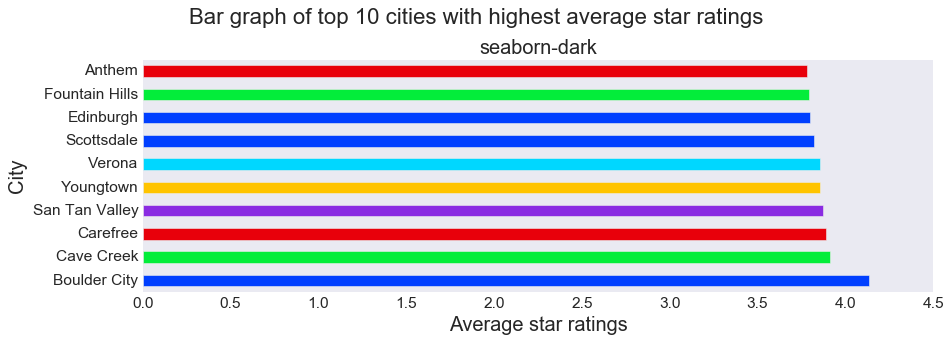

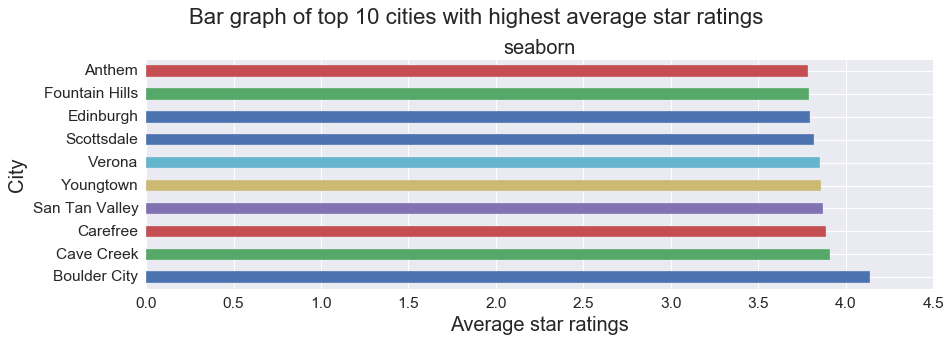

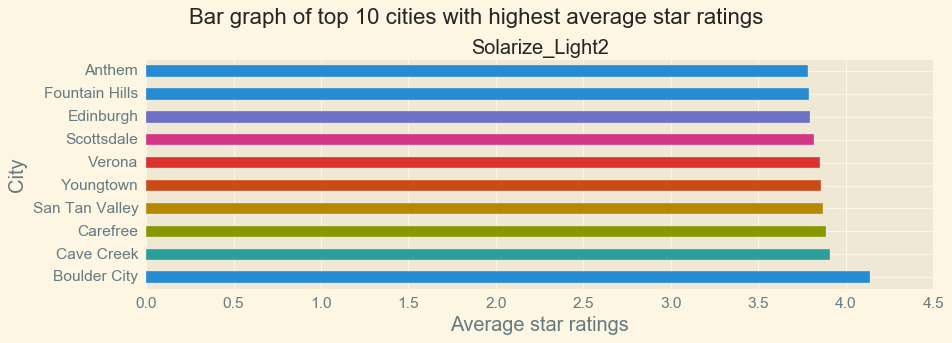

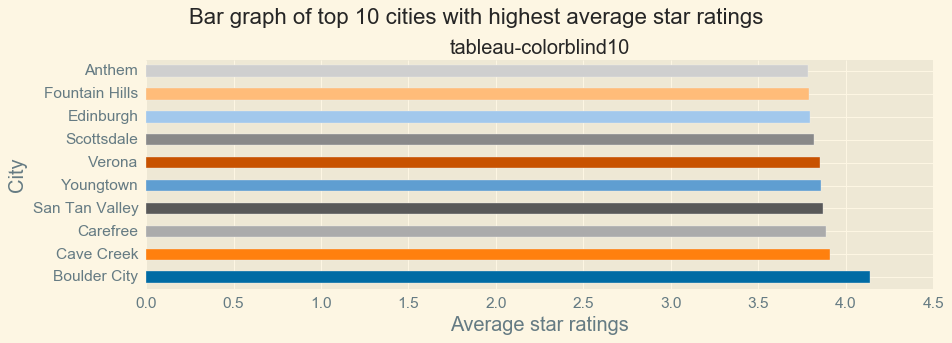

In [22]:
#now, let's try out a few more different styles to see the difference 

#select a list of styles to test here 
styles = ['dark_background',
 'fivethirtyeight',
 'ggplot',
 'seaborn-bright',
 'seaborn-dark',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10']

#plot using each of the styles on the list
for style_plot in styles:
    Plot_barH(style_plot)

### Saving the figures

There are different ways to save a file in MPL. Since <i>fig<i> is an object, you can save the fig using different formats as long as they are supported by your system. 

In [23]:
#you can check out the formats supported by your system
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [24]:
fig.savefig('avg_star_rating.png', transparent=False, dpi=80, bbox_inches='tight')
#setting bbox_inches='tight' minimizes excess white space